# Q5

In [2]:
import pandas as pd 
import numpy as np
from statsmodels.tsa.stattools import acf,pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
import pmdarima 
from pmdarima.arima import ARIMA as pmd_arima
import matplotlib.pyplot as plt

(a)

In [3]:
xy = pd.read_excel("../../data/xyseries.xls")

In [4]:
def analyze_acf(x:pd.Series, confidence_interval = 0.95, qstat = True): 
    """
    Confidence interval for ACF 
    Qstat for lags excludes lag zero
    Pvalues associated with Qstat for values exclduing zero
    """
    values = acf (x, qstat = qstat, alpha = (1-confidence_interval))
    df = pd.DataFrame(values).T 
    df.columns = ['ACF','CI','qstat','pvalue']
    df.loc[:,['qstat','pvalue']] = df.loc[:,['qstat','pvalue']].shift(1)
    df["CI"] = df["CI"].apply(lambda ci: [round(ci[0], 4), round(ci[1], 4)] if isinstance(ci,np.ndarray) else None)
    df.index.name = "Lags"
    return df 

def analyze_pacf(x:pd.Series, confidence_interval = 0.95):
    values = pacf (x, alpha = (1-confidence_interval))
    df = pd.DataFrame(values).T 
    df.columns = ['PACF','CI']
    df["CI"] = df["CI"].apply(lambda ci: [round(ci[0], 4), round(ci[1], 4)] if isinstance(ci,np.ndarray) else None)
    df.index.name = "Lags"
    
    return df 



In [5]:
x_acf = analyze_acf(xy.loc[:,"X"])
print(x_acf)

           ACF                 CI        qstat pvalue
Lags                                                 
0          1.0         [1.0, 1.0]         None   None
1     0.817783   [0.7301, 0.9054]   336.394459    0.0
2     0.729225   [0.5952, 0.8632]   604.414793    0.0
3     0.628703   [0.4671, 0.7904]   804.037089    0.0
4      0.53342    [0.354, 0.7129]   948.026537    0.0
5     0.476827   [0.2856, 0.6681]  1063.316385    0.0
6     0.418093   [0.2179, 0.6183]  1152.132785    0.0
7     0.370652   [0.1639, 0.5774]  1222.078372    0.0
8     0.350962   [0.1391, 0.5628]  1284.917405    0.0
9     0.338078   [0.1218, 0.5543]  1343.346204    0.0
10    0.335497   [0.1152, 0.5558]  1401.003687    0.0
11     0.33473   [0.1106, 0.5589]  1458.515124    0.0
12     0.32252   [0.0946, 0.5505]  1512.016619    0.0
13    0.317171   [0.0857, 0.5486]  1563.864691    0.0
14     0.30703   [0.0723, 0.5418]  1612.550229    0.0
15    0.309559   [0.0717, 0.5474]   1662.14311    0.0
16    0.317727   [0.0768, 0.

In [6]:
x_pacf = analyze_pacf(xy.loc[:,"X"])
print(x_pacf)

          PACF                  CI
Lags                              
0          1.0          [1.0, 1.0]
1     0.819421    [0.7318, 0.9071]
2     0.184759    [0.0971, 0.2724]
3    -0.025194   [-0.1128, 0.0625]
4    -0.046346    [-0.134, 0.0413]
5     0.065538   [-0.0221, 0.1532]
6     0.007862   [-0.0798, 0.0955]
7     0.002451   [-0.0852, 0.0901]
8     0.072182   [-0.0155, 0.1598]
9     0.060187   [-0.0275, 0.1478]
10    0.049237   [-0.0384, 0.1369]
11    0.034475   [-0.0532, 0.1221]
12   -0.003549   [-0.0912, 0.0841]
13    0.025679    [-0.062, 0.1133]
14    0.015303    [-0.0723, 0.103]
15    0.058365    [-0.0293, 0.146]
16    0.060581   [-0.0271, 0.1482]
17   -0.001328    [-0.089, 0.0863]
18   -0.012611    [-0.1003, 0.075]
19   -0.131125  [-0.2188, -0.0435]
20   -0.025474   [-0.1131, 0.0622]
21    0.117001    [0.0293, 0.2047]
22   -0.048716   [-0.1364, 0.0389]
23    0.007612     [-0.08, 0.0953]
24   -0.001008   [-0.0887, 0.0866]
25    0.007776   [-0.0799, 0.0954]
26   -0.057242   [-0

(b)

Figure(640x480)


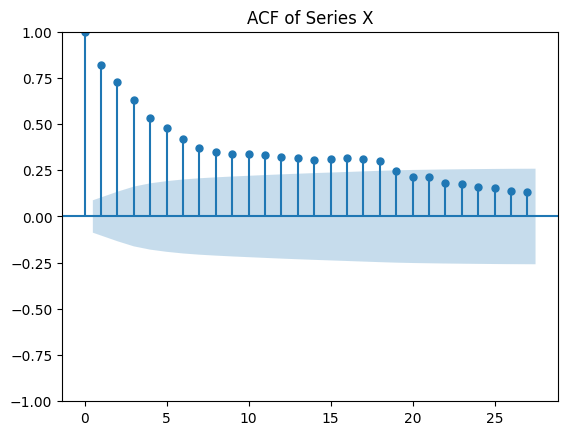

In [7]:
x_acf_plot = plot_acf(xy.loc[:,"X"],alpha=0.05,title="ACF of Series X")
print(x_acf_plot)

Figure(640x480)


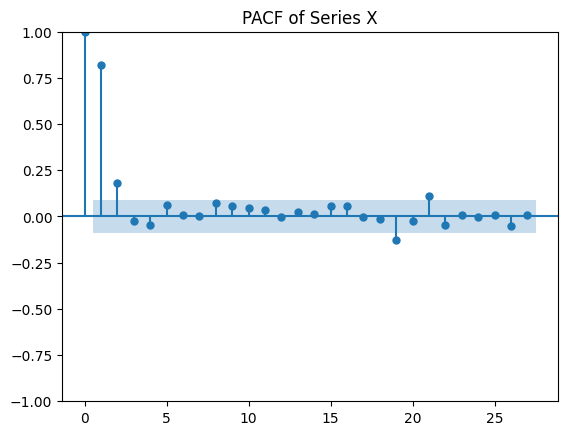

In [8]:
x_pacf_plot = plot_pacf(xy.loc[:,"X"],alpha=0.05,title="PACF of Series X")
print(x_pacf_plot)

Just by looking at the ACF / PACF plot, AR(1) or AR(2) model has the highest possibility of the best fit model. 
PACF shows that holding other parameters constant, it is giving beta_2 has 95% confidence interval of [0.0971, 0.2724] meaning that it captures some autocorrelation that is not captured by the first lag term. However, we should further do residual analysis to check if the fit model's residual has autocorrelation.

(c)

In [9]:
model = ARIMA(endog = xy.loc[:,"X"],order=(2,0,0)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      X   No. Observations:                  500
Model:                 ARIMA(2, 0, 0)   Log Likelihood                -704.493
Date:                Fri, 24 Jan 2025   AIC                           1416.986
Time:                        09:17:04   BIC                           1433.845
Sample:                             0   HQIC                          1423.602
                                - 500                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.3986      0.304     34.186      0.000       9.802      10.995
ar.L1          0.6714      0.048     14.047      0.000       0.578       0.765
ar.L2          0.1819      0.048      3.823      0.000       0.089       0.275
sigma2         0.9780      0.060     16.402      0.000       0.861       1.095
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 1.75
Prob(Q):                              0.89   Prob(JB):                         0.42
Heteroskedasticity (H):               0.90   Skew:                            -0.09
Prob(H) (two-sided):                  0.49   Kurtosis:                         3.23
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

(d)

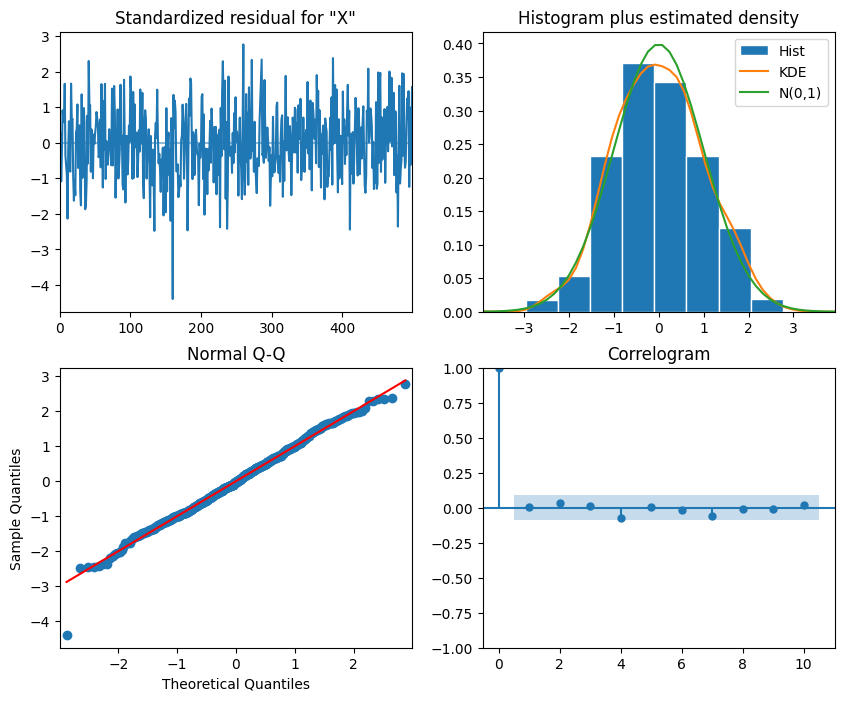

In [10]:
# Fit ARIMA model
model = ARIMA(endog = xy.loc[:,"X"],order=(2, 0, 0)).fit()

# Plot residual diagnostics
model.plot_diagnostics(figsize=(10, 8))
plt.show()

(e)

In [11]:
y_acf = analyze_acf(xy.loc[:,"Y"])
print(y_acf)

           ACF                  CI       qstat pvalue
Lags                                                 
0          1.0          [1.0, 1.0]        None   None
1     0.573201    [0.4855, 0.6609]   165.26731    0.0
2     0.343885    [0.2311, 0.4567]  224.870748    0.0
3    -0.048917   [-0.1695, 0.0717]  226.079215    0.0
4    -0.008172   [-0.1289, 0.1126]  226.113012    0.0
5     0.071363   [-0.0494, 0.1921]  228.695386    0.0
6     0.115751   [-0.0053, 0.2368]  235.503035    0.0
7     0.106106   [-0.0158, 0.2281]  241.235082    0.0
8     0.035881   [-0.0868, 0.1585]  241.891894    0.0
9    -0.001742    [-0.1245, 0.121]  241.893445    0.0
10    0.003935   [-0.1188, 0.1267]  241.901377    0.0
11     0.04849   [-0.0742, 0.1712]  243.108272    0.0
12    0.023839    [-0.099, 0.1467]  243.400579    0.0
13    0.044268   [-0.0786, 0.1672]   244.41059    0.0
14   -0.021487   [-0.1445, 0.1016]  244.649045    0.0
15    0.032514   [-0.0906, 0.1556]  245.196158    0.0
16    0.018975   [-0.1042, 0

In [12]:
y_pacf = analyze_pacf(xy.loc[:,"Y"])
print(y_pacf)

          PACF                  CI
Lags                              
0          1.0          [1.0, 1.0]
1      0.57435     [0.4867, 0.662]
2     0.022964   [-0.0647, 0.1106]
3    -0.382447  [-0.4701, -0.2948]
4      0.27534     [0.1877, 0.363]
5     0.216113    [0.1285, 0.3038]
6    -0.242232  [-0.3299, -0.1546]
7     0.048904   [-0.0387, 0.1366]
8     0.139901    [0.0522, 0.2276]
9     -0.13585  [-0.2235, -0.0482]
10    0.022966   [-0.0647, 0.1106]
11    0.163376     [0.0757, 0.251]
12   -0.201386   [-0.289, -0.1137]
13    0.068137   [-0.0195, 0.1558]
14     0.08487   [-0.0028, 0.1725]
15   -0.058916   [-0.1466, 0.0287]
16    0.008731   [-0.0789, 0.0964]
17     0.11245    [0.0248, 0.2001]
18   -0.096796  [-0.1844, -0.0091]
19   -0.095578  [-0.1832, -0.0079]
20   -0.077176   [-0.1648, 0.0105]
21   -0.031625    [-0.1193, 0.056]
22   -0.055058   [-0.1427, 0.0326]
23    0.054562   [-0.0331, 0.1422]
24   -0.060278   [-0.1479, 0.0274]
25    -0.02203   [-0.1097, 0.0656]
26     0.04043   [-0

c:\Users\moose\anaconda3\Lib\site-packages\pmdarima\utils\visualization.py:220: FutureWarning: the 'unbiased' keyword is deprecated, use 'adjusted' instead.
  res = tsaplots.plot_acf(


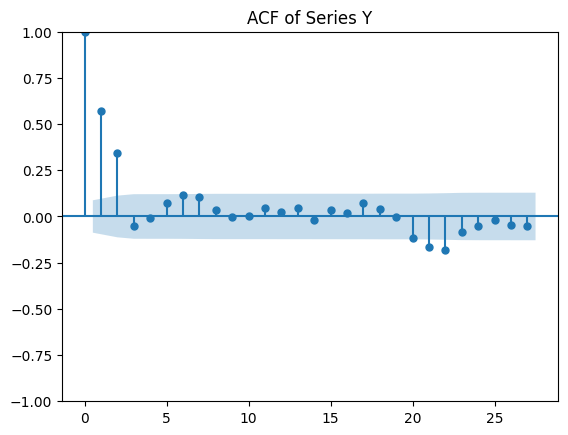

In [13]:
pmdarima.plot_acf(xy.loc[:,"Y"],alpha=0.05,title="ACF of Series Y")

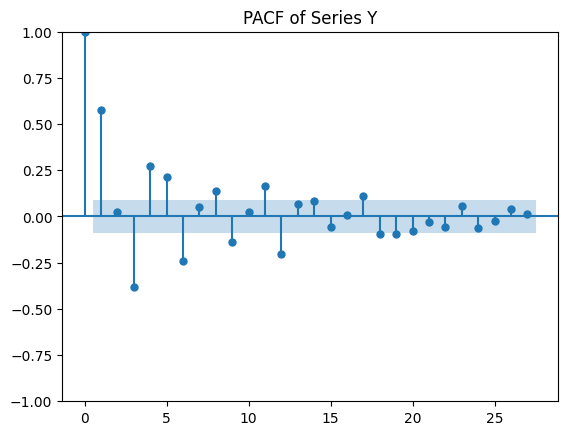

In [14]:
pmdarima.plot_pacf(xy.loc[:,"Y"],alpha=0.05,title="PACF of Series Y")

By looking at the ACF / PACF plot, MA(2) model has the highest possibility of the best fit model. 
PACF is gradually decreasing while alternating signs and moreover, ACF graph goes straight close to zero after first two lags.

In [15]:
model_y = ARIMA(endog = xy.loc[:,"Y"],order=(0,0,2)).fit()
model_y.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      Y   No. Observations:                  500
Model:                 ARIMA(0, 0, 2)   Log Likelihood                -727.224
Date:                Fri, 24 Jan 2025   AIC                           1462.448
Time:                        09:17:04   BIC                           1479.306
Sample:                             0   HQIC                          1469.063
                                - 500                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0248      0.127      8.094      0.000       0.777       1.273
ma.L1          0.8155      0.018     45.724      0.000       0.781       0.850
ma.L2          0.9257      0.018     52.274      0.000       0.891       0.960
sigma2         1.0648      0.069     15.353      0.000       0.929       1.201
===================================================================================
Ljung-Box (L1) (Q):                   2.00   Jarque-Bera (JB):                 0.69
Prob(Q):                              0.16   Prob(JB):                         0.71
Heteroskedasticity (H):               0.88   Skew:                             0.08
Prob(H) (two-sided):                  0.40   Kurtosis:                         2.91
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

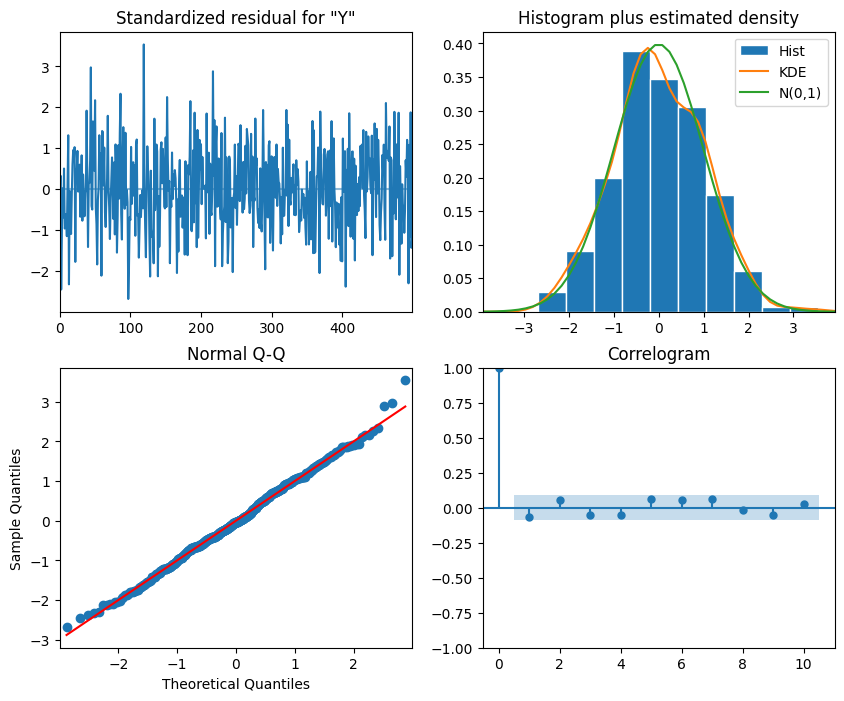

In [16]:

# Plot residual diagnostics
model_y.plot_diagnostics(figsize=(10, 8))
plt.show()

(extra) - sanity check

In [17]:
model = pmdarima.auto_arima(
    y=xy.loc[:, "X"],  # Dependent Variable
    seasonal=False,          # Seasonality
    stepwise=True,           # Explore
    suppress_warnings=True,  # 
    max_order=10             # MAX sum of ARMA coeff
)


print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  500
Model:               SARIMAX(2, 1, 1)   Log Likelihood                -703.068
Date:                Fri, 24 Jan 2025   AIC                           1414.136
Time:                        09:17:08   BIC                           1430.986
Sample:                             0   HQIC                          1420.749
                                - 500                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6524      0.047     13.806      0.000       0.560       0.745
ar.L2          0.1644      0.050      3.268      0.001       0.066       0.263
ma.L1         -0.9832      0.011    -86.881      0.0

In [18]:
model = pmdarima.auto_arima(
    y=xy.loc[:, "Y"],  # Dependent Variable
    seasonal=False,          # Seasonality
    stepwise=True,           # Explore
    suppress_warnings=True,  # 
    max_order=10             # MAX sum of ARMA coeff
)


print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  500
Model:               SARIMAX(1, 0, 2)   Log Likelihood                -725.847
Date:                Fri, 24 Jan 2025   AIC                           1461.695
Time:                        09:17:13   BIC                           1482.768
Sample:                             0   HQIC                          1469.964
                                - 500                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.1109      0.138      8.078      0.000       0.841       1.380
ar.L1         -0.0834      0.052     -1.613      0.107      -0.185       0.018
ma.L1          0.8342      0.019     44.515      0.0

Q6

In [19]:
ttm = pd.read_excel("../../data/ttm.xls")
# EX : Exchange # SYM: Symbol # SIZE : Lot size # PRICE : price

(a)

<Axes: >

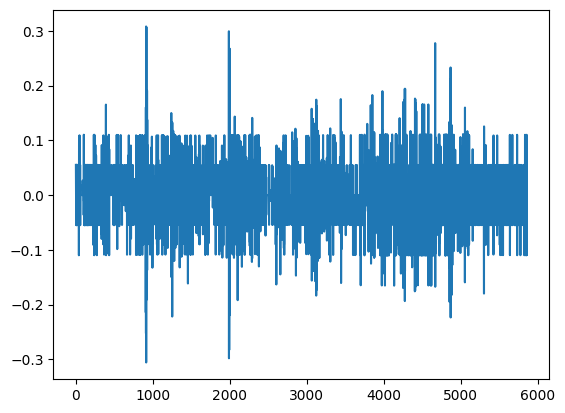

In [20]:
ttm['RET'] = ttm['PRICE'].pct_change()*100
ttm.dropna(inplace=True)
ttm['RET'].plot()

(b)

In [21]:
ttm_acf = analyze_acf(ttm.loc[:,"RET"])
ttm_acf

,ACF,CI,qstat,pvalue
Lags,,,,
0,1.0,"[1.0, 1.0]",None,None
1,-0.412171,"[-0.4378, -0.3866]",995.526665,0.0
2,0.013829,"[-0.0158, 0.0435]",996.647491,0.0
3,-0.030844,"[-0.0605, -0.0012]",1002.224456,0.0
4,-0.000695,"[-0.0304, 0.029]",1002.227285,0.0
5,0.001559,"[-0.0281, 0.0312]",1002.241543,0.0
6,-0.01027,"[-0.0399, 0.0194]",1002.860129,0.0
7,0.011797,"[-0.0179, 0.0415]",1003.676478,0.0
8,0.001365,"[-0.0283, 0.031]",1003.687408,0.0


In [22]:
ttm_pacf = analyze_pacf(ttm.loc[:,"RET"])
ttm_pacf

,PACF,CI
Lags,,
0,1.0,"[1.0, 1.0]"
1,-0.412242,"[-0.4379, -0.3866]"
2,-0.188071,"[-0.2137, -0.1625]"
3,-0.126909,"[-0.1525, -0.1013]"
4,-0.083018,"[-0.1086, -0.0574]"
5,-0.049906,"[-0.0755, -0.0243]"
6,-0.044031,"[-0.0696, -0.0184]"
7,-0.018257,"[-0.0439, 0.0074]"
8,-0.005497,"[-0.0311, 0.0201]"


Figure(640x480)


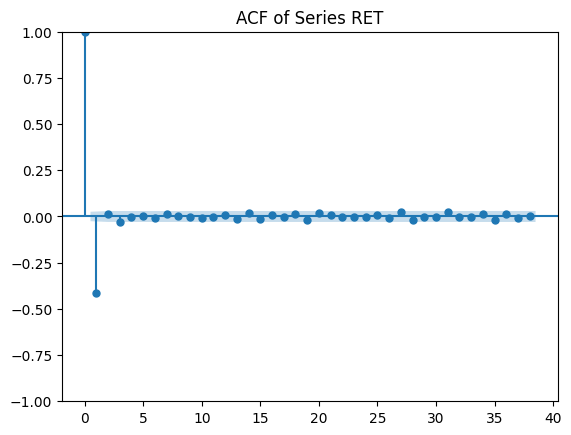

In [23]:
ttm_acf_plot = plot_acf(ttm.loc[:,"RET"],alpha=0.05,title="ACF of Series RET")
print(ttm_acf_plot)

Figure(640x480)


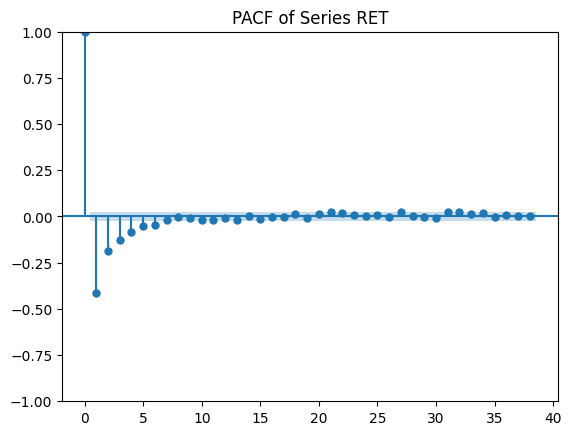

In [24]:
ttm_pacf_plot = plot_pacf(ttm.loc[:,"RET"],alpha=0.05,title="PACF of Series RET")
print(ttm_pacf_plot)

In my opinion, MA(1) model looks like the best model here because first of all, looking at the PACF graph it is a slowly decaying function and ACF also straightly go to zero after the first lag which is a typical graph for MA models. Looking at ACF graph, the ACF dies off after the first lag thus it is most likely that the parameter q is 1 since the time series model is uncorrelated after j+1(j>0) lags.

(c)

c:\Users\moose\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\moose\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\moose\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                    RET   No. Observations:                 5857
Model:                 ARIMA(0, 0, 1)   Log Likelihood               10609.869
Date:                Fri, 24 Jan 2025   AIC                         -21213.739
Time:                        09:17:14   BIC                         -21193.713
Sample:                             0   HQIC                        -21206.776
                               - 5857                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.089e-05      0.000      0.131      0.896      -0.000       0.000
ma.L1         -0.5458      0.008    -66.867      0.000      -0.562      -0.530
sigma2         0.0016   1.74e-05     89.882      0.0

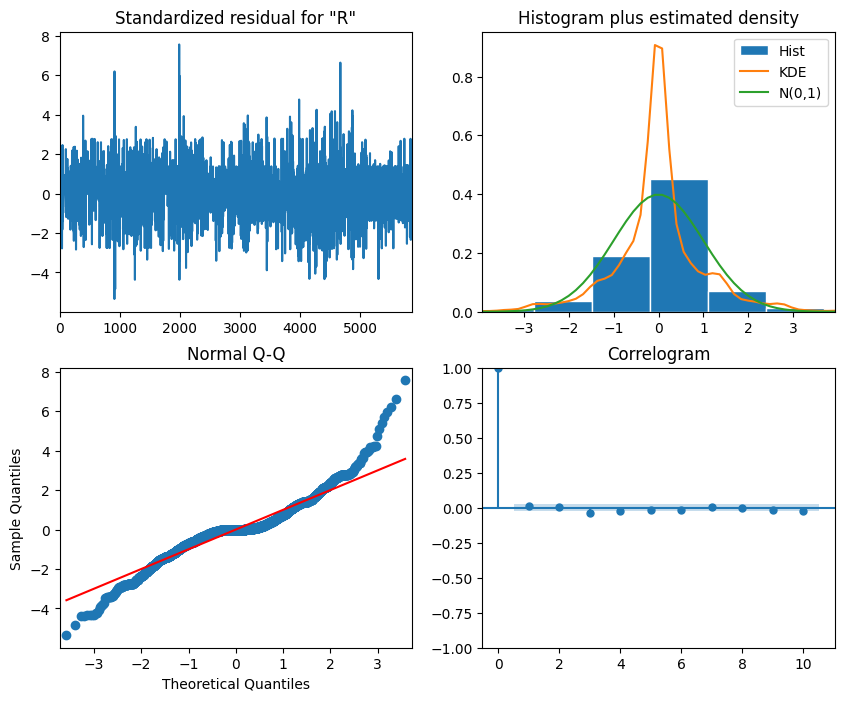

In [25]:
# Fit ARIMA model
model_ttm = ARIMA(endog = ttm.loc[:,"RET"],order=(0, 0, 1)).fit()
print(model_ttm.summary())
# Plot residual diagnostics
model_ttm.plot_diagnostics(figsize=(10, 8))
plt.show()

It passes residual diagnostics as correlogram for resiuals are effectively zero and between confidence interval that is not significantly different from zero. 

(d)

c:\Users\moose\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\moose\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\moose\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                    RET   No. Observations:                 5857
Model:                 ARIMA(0, 0, 2)   Log Likelihood               10612.050
Date:                Fri, 24 Jan 2025   AIC                         -21216.101
Time:                        09:17:16   BIC                         -21189.399
Sample:                             0   HQIC                        -21206.817
                               - 5857                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.087e-05      0.000      0.135      0.892      -0.000       0.000
ma.L1         -0.5330      0.009    -60.912      0.000      -0.550      -0.516
ma.L2         -0.0270      0.009     -2.898      0.0

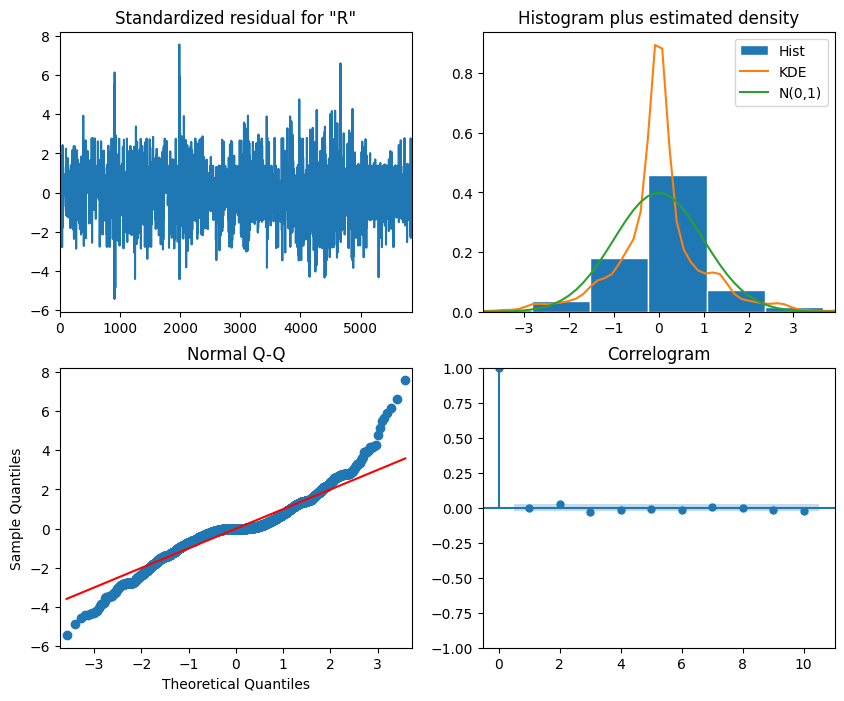

In [26]:
# Fit ARIMA model
model_ttm_2 = ARIMA(endog = ttm.loc[:,"RET"],order=(0, 0, 2)).fit()
print(model_ttm_2.summary())
# Plot residual diagnostics
model_ttm_2.plot_diagnostics(figsize=(10, 8))
plt.show()

Although coefficient of lag2 error is smaller than the first one, it is still quite significantly different from zero as can be seen in summary statistics. MA(2) model passes the residual diagnostics as correlation of errors are also close to zero.

(e)

c:\Users\moose\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\moose\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\moose\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                    RET   No. Observations:                 5857
Model:                 ARIMA(1, 0, 0)   Log Likelihood               10429.349
Date:                Fri, 24 Jan 2025   AIC                         -20852.698
Time:                        09:17:16   BIC                         -20832.672
Sample:                             0   HQIC                        -20845.735
                               - 5857                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.677e-05      0.000      0.097      0.923      -0.001       0.001
ar.L1         -0.4122      0.007    -55.106      0.000      -0.427      -0.398
sigma2         0.0017   1.67e-05     99.390      0.0

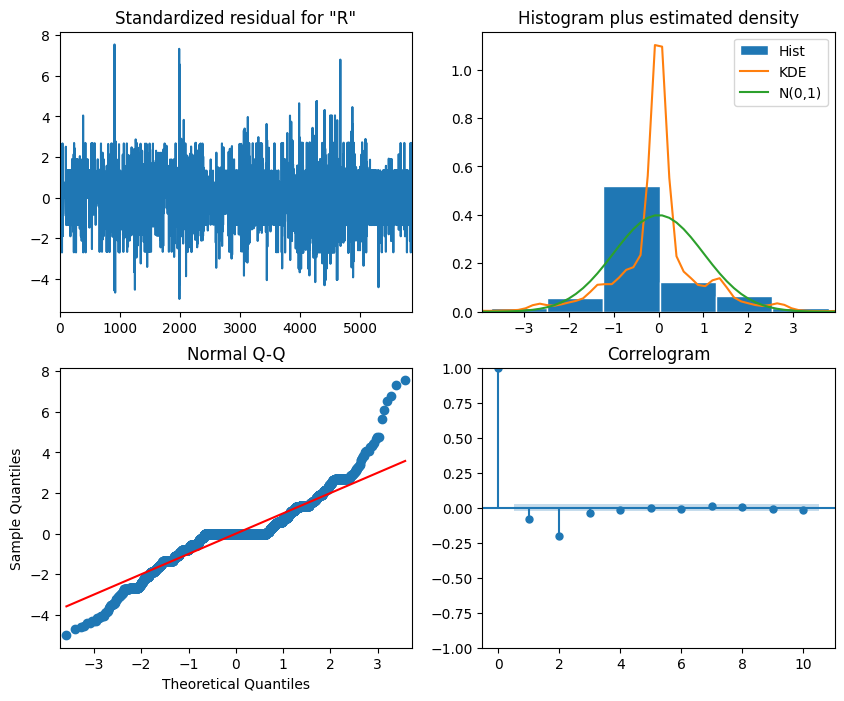

In [27]:
# Fit ARIMA model
model_ttm_ar1 = ARIMA(endog = ttm.loc[:,"RET"],order=(1, 0, 0)).fit()
print(model_ttm_ar1.summary())
# Plot residual diagnostics
model_ttm_ar1.plot_diagnostics(figsize=(10, 8))
plt.show()

c:\Users\moose\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\moose\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\moose\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                    RET   No. Observations:                 5857
Model:                 ARIMA(2, 0, 0)   Log Likelihood               10534.923
Date:                Fri, 24 Jan 2025   AIC                         -21061.845
Time:                        09:17:17   BIC                         -21035.144
Sample:                             0   HQIC                        -21052.562
                               - 5857                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.679e-05      0.000      0.117      0.907      -0.001       0.001
ar.L1         -0.4899      0.008    -57.952      0.000      -0.506      -0.473
ar.L2         -0.1883      0.008    -22.173      0.0

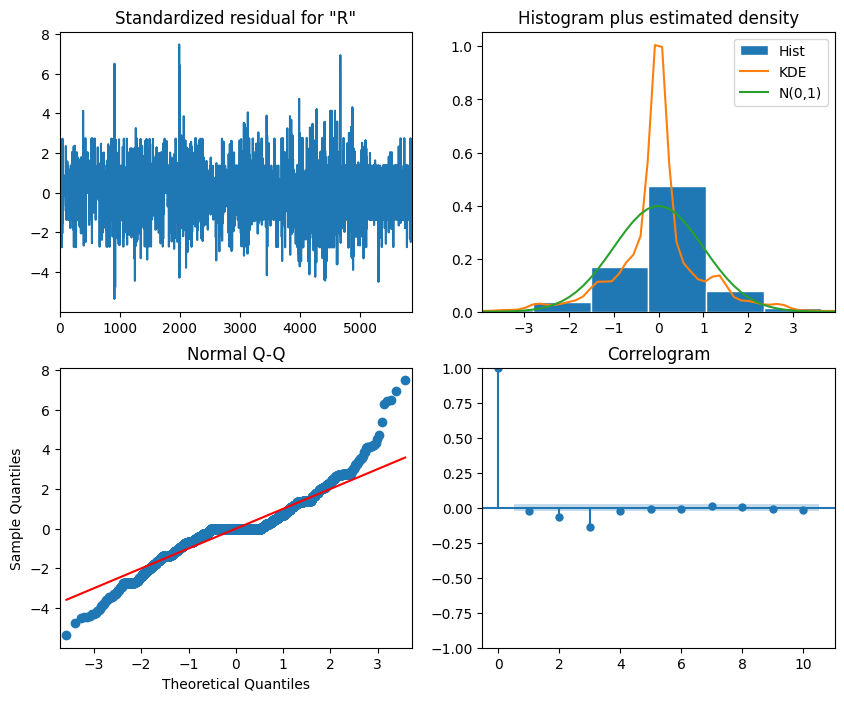

In [28]:
# Fit ARIMA model
model_ttm_ar2 = ARIMA(endog = ttm.loc[:,"RET"],order=(2, 0, 0)).fit()
print(model_ttm_ar2.summary())
# Plot residual diagnostics
model_ttm_ar2.plot_diagnostics(figsize=(10, 8))
plt.show()

c:\Users\moose\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\moose\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\moose\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                    RET   No. Observations:                 5857
Model:                 ARIMA(3, 0, 0)   Log Likelihood               10582.440
Date:                Fri, 24 Jan 2025   AIC                         -21154.880
Time:                        09:17:18   BIC                         -21121.504
Sample:                             0   HQIC                        -21143.276
                               - 5857                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.521e-05      0.000      0.128      0.898      -0.001       0.001
ar.L1         -0.5138      0.009    -59.214      0.000      -0.531      -0.497
ar.L2         -0.2505      0.010    -25.035      0.0

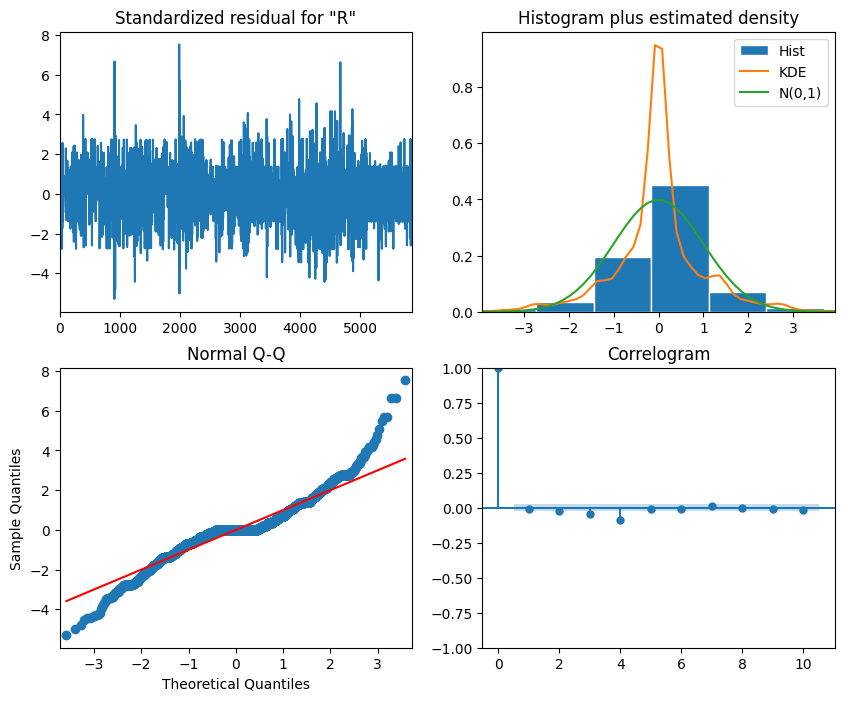

In [29]:
# Fit ARIMA model
model_ttm_ar3 = ARIMA(endog = ttm.loc[:,"RET"],order=(3, 0, 0)).fit()
print(model_ttm_ar3.summary())
# Plot residual diagnostics
model_ttm_ar3.plot_diagnostics(figsize=(10, 8))
plt.show()

None of the AR model passes residual diagnostics as it exhibits some dependency of errors for different lags.

(extra) - sanity check

In [30]:
model = pmdarima.auto_arima(
    y=ttm.loc[:, "RET"],  # Dependent Variable
    seasonal=False,          # Seasonality
    stepwise=True,           # Explore
    start_p = 0,
    start_q = 0,
    max_p = 5,
    max_q = 0,
    suppress_warnings=True,  # 
    max_order=10             # MAX sum of ARMA coeff
)


print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 5857
Model:               SARIMAX(5, 0, 0)   Log Likelihood               10610.007
Date:                Fri, 24 Jan 2025   AIC                         -21208.014
Time:                        09:17:21   BIC                         -21167.961
Sample:                             0   HQIC                        -21194.088
                               - 5857                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5285      0.009    -60.266      0.000      -0.546      -0.511
ar.L2         -0.2798      0.011    -25.639      0.000      -0.301      -0.258
ar.L3         -0.1834      0.012    -15.406      0.0

In [31]:
model = pmdarima.auto_arima(
    y=ttm.loc[:, "RET"],  # Dependent Variable
    seasonal=False,          # Seasonality
    stepwise=True,           # Explore
    start_p = 0,
    start_q = 0,
    max_p = 0,
    max_q = 5,
    suppress_warnings=True,  # 
    max_order=10             # MAX sum of ARMA coeff
)


print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 5857
Model:               SARIMAX(0, 0, 3)   Log Likelihood               10617.434
Date:                Fri, 24 Jan 2025   AIC                         -21226.869
Time:                        09:17:24   BIC                         -21200.167
Sample:                             0   HQIC                        -21217.585
                               - 5857                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.5315      0.009    -60.899      0.000      -0.549      -0.514
ma.L2         -0.0040      0.010     -0.417      0.677      -0.023       0.015
ma.L3         -0.0409      0.009     -4.521      0.0

(f) Using the MA(2) model from part d, build the in sample one step ahead forecasts.  Present the 
plot.

reference : 
https://alkaline-ml.com/pmdarima/modules/generated/pmdarima.arima.ARIMA.html#pmdarima.arima.ARIMA.predict_in_sample

https://github.com/alkaline-ml/pmdarima/blob/master/pmdarima/arima/arima.py



In [32]:
model_ttm_ma2 = pmd_arima(order=(0,0,2)).fit(ttm.loc[:,"RET"])
insample_forecasts = model_ttm_ma2.predict_in_sample(start=2, return_conf_int=True) # roll 1-step forward
predicted_values = insample_forecasts[0]
confint = insample_forecasts[1]


c:\Users\moose\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\moose\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


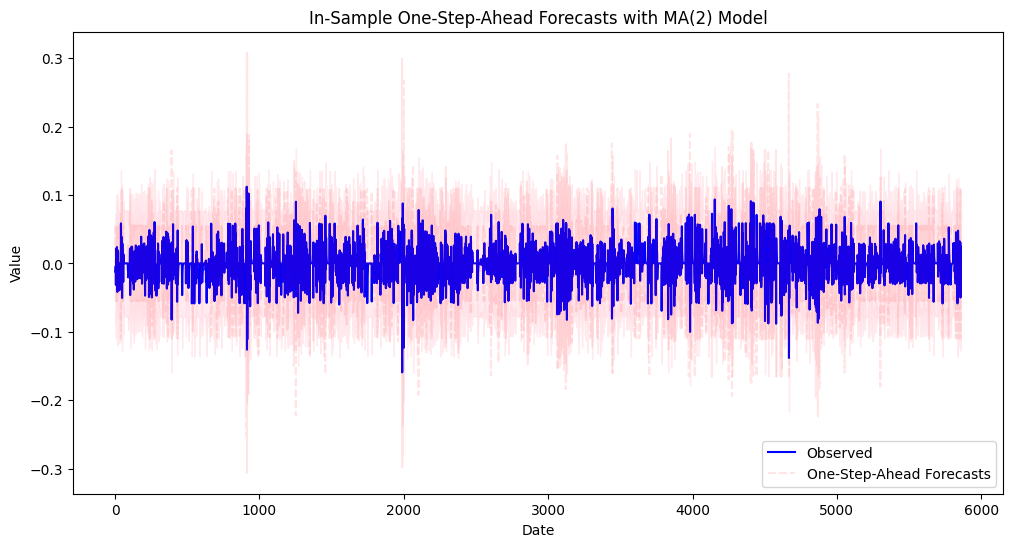

In [33]:
plt.figure(figsize=(12, 6))
plt.plot(predicted_values, label='Observed', color='blue')
plt.plot(ttm.loc[:,"RET"], label='One-Step-Ahead Forecasts', color='red', linestyle='--',alpha = 0.1)
plt.fill_between(predicted_values.index,
                 confint[:, 0],
                 confint[:, 1], color='pink', alpha=0.3)
plt.title('In-Sample One-Step-Ahead Forecasts with MA(2) Model')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

Q7

In [34]:
fred = pd.read_excel("../../data/CPALTT01USM657N.xlsx",sheet_name="Monthly")
fred.set_index("observation_date",inplace=True)

(a)

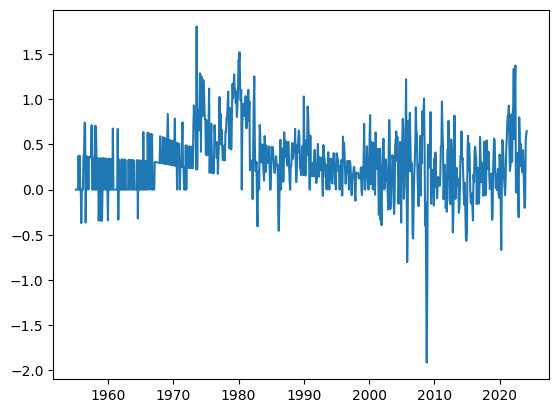

In [35]:
plt.plot(fred)

It seems dependent as when huge spikes occured, the values tend to hover around the spikes for some time

In [36]:
analyze_acf(fred['CPALTT01USM657N']).head(10)

,ACF,CI,qstat,pvalue
Lags,,,,
0,1.0,"[1.0, 1.0]",None,None
1,0.546737,"[0.4787, 0.6148]",249.002608,0.0
2,0.371739,"[0.2857, 0.4577]",364.254375,0.0
3,0.264352,"[0.1712, 0.3575]",422.606955,0.0
4,0.267383,"[0.1708, 0.3639]",482.377683,0.0
5,0.234587,"[0.1347, 0.3345]",528.441086,0.0
6,0.216052,"[0.1136, 0.3185]",567.560508,0.0
7,0.252236,"[0.1477, 0.3568]",620.944995,0.0
8,0.259228,"[0.1519, 0.3665]",677.398815,0.0


Figure(640x480)


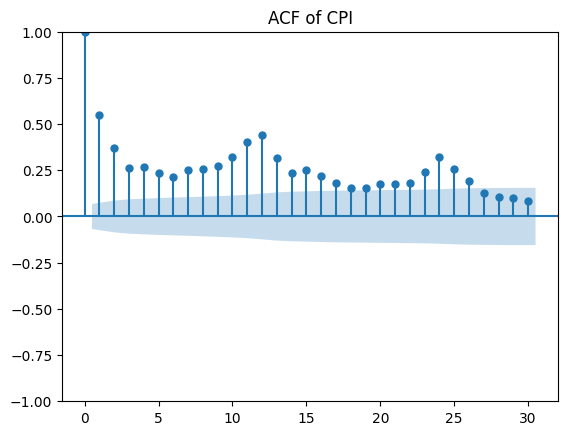

In [37]:
print(plot_acf(fred.loc[:,'CPALTT01USM657N'],alpha=0.05,title="ACF of CPI"))

Figure(640x480)


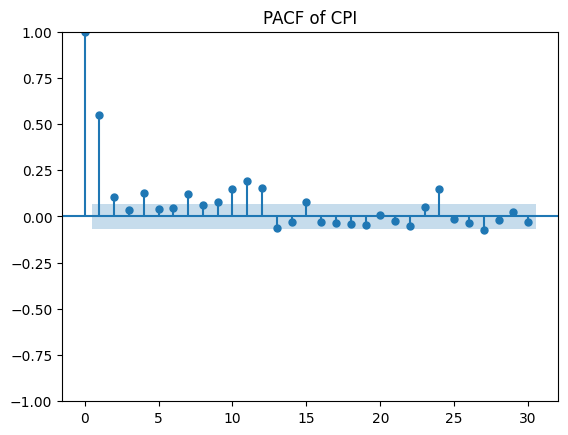

In [38]:
print(plot_pacf(fred.loc[:,'CPALTT01USM657N'],alpha=0.05,title="PACF of CPI"))

There seems to be an significant autocorrelation as most of the autocorrelation is above the 95% confidence interval. 
Notable pattern here is that acf shows seasonality where it comes down and goes back again as it goes back to 12X lag multiple.
This shows that we need to adjust seasonality to properly analyze the cpi data.   


(c)

In [39]:
cpi_model_ar = ARIMA(endog = fred, order=(11,0,0)).fit()
cpi_model_ar.summary()

c:\Users\moose\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\moose\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\moose\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:        CPALTT01USM657N   No. Observations:                  830
Model:                ARIMA(11, 0, 0)   Log Likelihood                -123.476
Date:                Fri, 24 Jan 2025   AIC                            272.951
Time:                        09:17:28   BIC                            334.330
Sample:                    02-01-1955   HQIC                           296.489
                         - 03-01-2024                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2906      0.061      4.796      0.000       0.172       0.409
ar.L1          0.4155      0.026     16.101      0.000       0.365       0.466
ar.L2          0.0572      0.030      1.930      0.054      -0.001       0.115
ar.L3         -0.0533      0.038     -1.393      0.163      -0.128       0.022
ar.L4          0.0830      0.037      2.240      0.025       0.010       0.156
ar.L5          0.0092      0.033      0.278      0.781      -0.056       0.074
ar.L6         -0.0311      0.036     -0.876      0.381      -0.101       0.039
ar.L7          0.0714      0.035      2.068      0.039       0.004       0.139
ar.L8          0.0266      0.035      0.761      0.447      -0.042       0.095
ar.L9         -0.0006      0.033     -0.018      0.986      -0.066       0.064
ar.L10         0.0652      0.036      1.823      0.068      -0.005       0.135
ar.L11         0.1928      0.033      5.889      0.000       0.129       0.257
sigma2         0.0787      0.003     28.567      0.000       0.073       0.084
===================================================================================
Ljung-Box (L1) (Q):                   0.77   Jarque-Bera (JB):               288.08
Prob(Q):                              0.38   Prob(JB):                         0.00
Heteroskedasticity (H):               1.36   Skew:                            -0.26
Prob(H) (two-sided):                  0.01   Kurtosis:                         5.84
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Figure(1000x800)


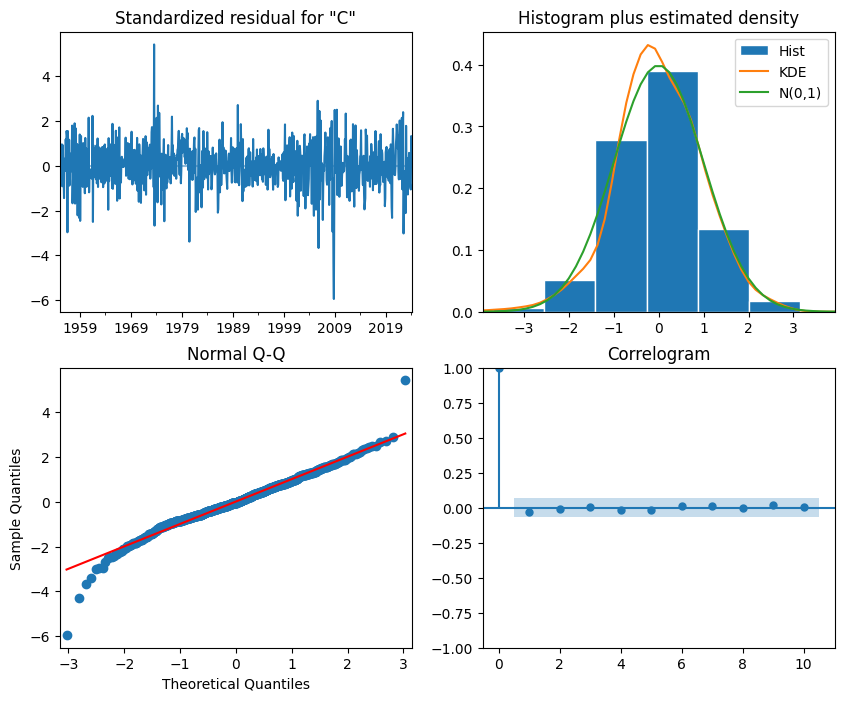

In [40]:
print(cpi_model_ar.plot_diagnostics(figsize=(10, 8)))

In [41]:
ar_roots = np.roots([1, *(-cpi_model_ar.params[1:-1].values)])
ar_modulus = [np.sqrt(root.real**2 + root.imag**2) for root in ar_roots]
print("AR Modulus:", ar_modulus)
print("AR is stationary:", all(mod > 1 for mod in ar_modulus))

AR Modulus: [0.9659497722923303, 0.9030971158033955, 0.9030971158033955, 0.8679816947724104, 0.8679816947724104, 0.863944804129941, 0.863944804129941, 0.8212718731538496, 0.8212718731538496, 0.8033675107353874, 0.8033675107353874]
AR is stationary: False


(extra) - sanity check

In [63]:
cpi_model = pmdarima.auto_arima(
    y=fred.iloc[:,0],  # Dependent Variable
    seasonal=False,          # Seasonality
    stepwise=True,           # Explore
    start_p = 0,
    start_q = 0,
    d=0,
    max_p = 24,
    max_q = 24,
    suppress_warnings=True,  # 
    max_order=20            # MAX sum of ARMA coeff
)


print(cpi_model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  830
Model:              SARIMAX(13, 0, 2)   Log Likelihood                -108.235
Date:                Fri, 24 Jan 2025   AIC                            250.471
Time:                        09:27:22   BIC                            330.735
Sample:                    02-01-1955   HQIC                           281.251
                         - 03-01-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0974      0.042      2.312      0.021       0.015       0.180
ar.L1         -0.4946      0.232     -2.134      0.033      -0.949      -0.040
ar.L2         -0.1411      0.122     -1.158      0.2

(d) Report the roots of the AR polynomial.  Recall that you can “view” a model as its ARMA
structure to get the roots.  What do the roots tell you about the dependence?  How quickly
should you expect shocks to die off?

In [82]:
 model = pmd_arima(order=(13,0,2))
 model.fit(fred)
 print("\nAR Roots:")
 print(model.arroots())
 print("\nMA Roots:")
 print(model.maroots())

c:\Users\moose\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\moose\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)



AR Roots:
[ 1.02684875-0.j          0.92835086-0.56255049j  0.92835086+0.56255049j
  0.52609806-0.9856355j   0.52609806+0.9856355j  -0.05732339-1.1100827j
 -0.05732339+1.1100827j  -0.55837827-0.952097j   -0.55837827+0.952097j
 -0.95019555-0.67867725j -0.95019555+0.67867725j -1.29466943-0.26236599j
 -1.29466943+0.26236599j]

MA Roots:
[-0.79391959-1.06972357j -0.79391959+1.06972357j]


c:\Users\moose\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



 The AR model exhibits high persistence due to roots inside or near the unit circle where roots must be in the inner circle to be invertible as its effect die off.
 Shocks have lasting effects and show cyclical patterns due to complex roots. MA roots are alternating between signs implying that it has osciliatory behavior. 


(e)

In [83]:
oos_cpi_model = cpi_model.predict(n_periods=24,return_conf_int=True)
oos_cpi_model_forecasts = oos_cpi_model[0]
oos_cpi_model_confint = oos_cpi_model[1]

In [84]:
oos_cpi_model_forecasts

2024-04-01    0.490173
2024-05-01    0.359196
2024-06-01    0.277346
2024-07-01    0.297308
2024-08-01    0.291360
2024-09-01    0.226673
2024-10-01    0.145897
2024-11-01    0.148699
2024-12-01    0.256049
2025-01-01    0.406020
2025-02-01    0.433765
2025-03-01    0.397830
2025-04-01    0.370791
2025-05-01    0.315244
2025-06-01    0.291847
2025-07-01    0.293174
2025-08-01    0.278832
2025-09-01    0.255510
2025-10-01    0.244711
2025-11-01    0.263560
2025-12-01    0.308069
2026-01-01    0.344410
2026-02-01    0.345708
2026-03-01    0.331901
Freq: MS, dtype: float64

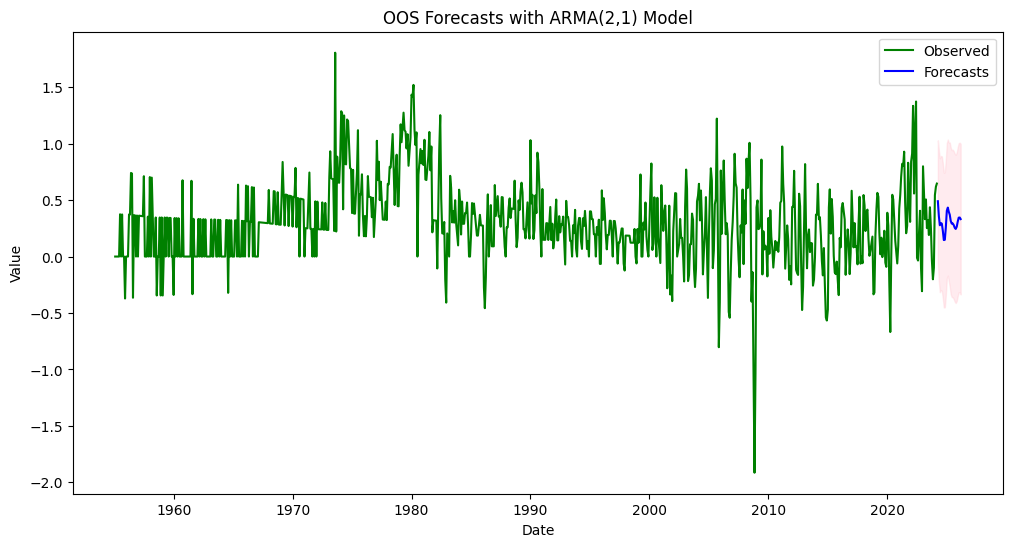

In [85]:
plt.figure(figsize=(12, 6))
plt.plot(fred.iloc[:,0],label="Observed",color='green')
plt.plot(oos_cpi_model_forecasts, label='Forecasts', color='blue')

plt.fill_between(oos_cpi_model_forecasts.index,
                 oos_cpi_model_confint[:, 0],
                 oos_cpi_model_confint[:, 1], color='pink', alpha=0.3)
plt.title('OOS Forecasts with ARMA(2,1) Model')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

Here I used the best fit model generated by auto arima fucntion